In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['AAPL','AMZN','GOOGL']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2020-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,AMZN,GOOGL
Date,,,
2020-01-02,73.894318,1898.010010,1368.680054
2020-01-03,73.175926,1874.969971,1361.520020
2020-01-06,73.759003,1902.880005,1397.810059
2020-01-07,73.412125,1906.859985,1395.109985
2020-01-08,74.593040,1891.969971,1405.040039


In [4]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,AMZN,GOOGL
Date,,,
2022-04-29,157.649994,2485.629883,2282.189941
2022-05-02,157.960007,2490.000000,2331.659912
2022-05-03,159.479996,2485.070068,2346.679932
2022-05-04,166.020004,2518.570068,2445.219971
2022-05-05,155.910004,2325.000000,2322.969971


<AxesSubplot:xlabel='Date'>

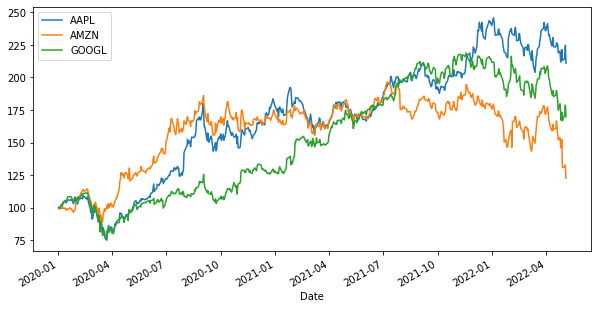

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.316374
AMZN     0.085981
GOOGL    0.224152
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,AMZN,GOOGL
AAPL,0.134917,0.085831,0.086633
AMZN,0.085831,0.129670,0.076496
GOOGL,0.086633,0.076496,0.108663


In [9]:
log_returns.corr() #get correlation between each pair.

,AAPL,AMZN,GOOGL
AAPL,1.000000,0.648925,0.715501
AMZN,0.648925,1.000000,0.644436
GOOGL,0.715501,0.644436,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,AAPL,AMZN,GOOGL
0,0.270153,0.342647,0.782440,0.189313,0.028247
1,0.241285,0.325418,0.588716,0.268939,0.142345
2,0.260847,0.319811,0.494733,0.064637,0.440630
3,0.195755,0.307903,0.153279,0.307826,0.538895
4,0.130693,0.328333,0.080878,0.730382,0.188740


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,AAPL,AMZN,GOOGL
2995,0.122993,0.341350,0.144038,0.828265,0.027697
2996,0.175142,0.320595,0.299766,0.554781,0.145454
2997,0.264194,0.324376,0.589863,0.103903,0.306235
2998,0.146601,0.320883,0.118046,0.640058,0.241897
2999,0.213625,0.330788,0.551906,0.444552,0.003542


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,AAPL,AMZN,GOOGL
318,0.197836,0.307844,0.179331,0.310153,0.510516
1193,0.195562,0.307848,0.165157,0.317152,0.517692
2966,0.194839,0.307859,0.169958,0.325589,0.504454
1950,0.198936,0.307885,0.193725,0.311802,0.494473
1034,0.193642,0.307888,0.168018,0.332960,0.499022
...,...,...,...,...,...
220,0.296709,0.356043,0.909899,0.082190,0.007912
1960,0.304158,0.356457,0.914753,0.031515,0.053731
2237,0.299898,0.357087,0.919301,0.065382,0.015317
739,0.307754,0.361271,0.953458,0.031323,0.015219


Text(0, 0.5, 'Expected Return')

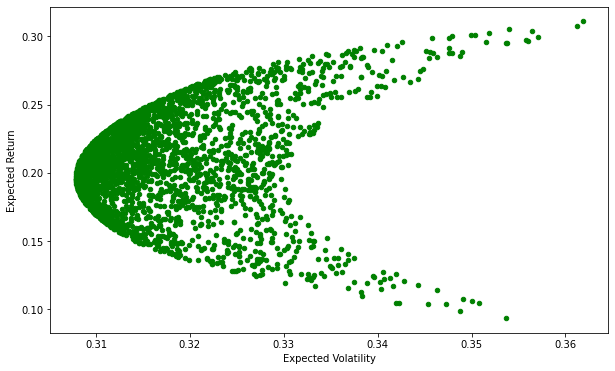

In [19]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6), c = 'g');
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets)
path_name = path + name  + '.csv'
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [17]:
# calculation & output
path_name2 = 'txt_results/' + name + '.txt'
f = open(path_name2, "a")

print("money amount calculation for demo use only, please don't simply invest on this results alone.", file=f)

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

# set money here 
total_investment = 50000
print("Intend to invest ${:.2f}".format(total_investment) + " total.", file=f)

money_inv = []
for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    money_inv.append(inv)
    print("\t{:.0f}".format(money_inv[i] // pf_data.iloc[-1][i]) + " shares should long in ticker:" + assets[i], file=f)
    print("\t price @ ${:.2f} per share".format(pf_data.iloc[-1][i]), file=f)
    print("\t invest in " + assets[i] + " for ${:.2f}".format(inv) + ".", file=f)
    print("\t  represents {:.1f}% of total investment".format(sorted_portfolios[assets[i]].iloc[0] * 100), file=f)
    
print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%", file=f)
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%", file=f)

f.close()